In [1]:
from datetime import datetime
from pathlib import Path
import random
import re
import string
import time
from urllib.parse import urljoin
from xmlrpc.client import ServerProxy

from dateutil import parser
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
import numpy as np
import pandas as pd
import requests
from tqdm import tqdm

In [2]:
base_url = 'https://pypi.python.org/pypi'

### Get list of all packages

In [3]:
def get_distributions_list(base_url):    
    client = ServerProxy(base_url)
    distributions = client.list_packages()
    return distributions

In [4]:
distributions = get_distributions_list(base_url)
distributions_count = len(distributions)
distributions_count

378373

### Find all used chars in distributions names

In [5]:
name_chars = set(''.join(distributions))
print(sorted(name_chars))

['-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


### Get stats for different package name types

In [6]:
def get_names_stats(all_names, possible_chars, required_chars=set(),
                    round_decimals=5, sample_size=5, random_state=42):
    all_names_count = len(all_names)
    names = [name for name in all_names 
             if required_chars <= set(name) <= possible_chars]
    names_count = len(names)
    names_prop = round(names_count / all_names_count, round_decimals)

    print(f'Possible chars: {"".join(sorted(possible_chars))}')
    print(f'Required chars: {"".join(sorted(required_chars))}')
    print(f'Names count: {names_count}')
    print(f'Names proportion: {names_prop:.{round_decimals}f}')
    
    if names:
        random.seed(random_state)
        names_sample = random.sample(names, k=min(sample_size, len(names)))
        print(f'Examples: {names_sample}')
        
    print()
    
    return names

In [7]:
no_char = set()
hyphen = set('-')
underscore = set('_')
dot = set('.')
punctuation = hyphen | underscore | dot
digits = set(string.digits)
letters = set(string.ascii_letters)

**Only letters**

In [8]:
names_letters = get_names_stats(distributions, letters)

Possible chars: ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
Required chars: 
Names count: 178639
Names proportion: 0.47212
Examples: ['mskit', 'blackhorse', 'WordPressAutoPost', 'mandarin', 'MakeSomeNoise']



**Only digits**

In [9]:
names_digits = get_names_stats(distributions, digits)

Possible chars: 0123456789
Required chars: 
Names count: 40
Names proportion: 0.00011
Examples: ['31', '2021', '42', '1', '5']



**Only punctuation**

In [10]:
names_punctuation = get_names_stats(distributions, punctuation)

Possible chars: -._
Required chars: 
Names count: 0
Names proportion: 0.00000



**Letters and digits**

In [11]:
letters_digits = letters | digits
names_letters_digits = get_names_stats(distributions, letters_digits)

Possible chars: 0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
Required chars: 
Names count: 192847
Names proportion: 0.50967
Examples: ['sendit', 'chd', 'irate', 'HashDL', 'busticate']



**Letters and punctuation**

In [12]:
letters_punctuation = letters | punctuation
names_letters_punctuation = get_names_stats(distributions, letters_punctuation)

Possible chars: -.ABCDEFGHIJKLMNOPQRSTUVWXYZ_abcdefghijklmnopqrstuvwxyz
Required chars: 
Names count: 336823
Names proportion: 0.89019
Examples: ['pyqt-hyperchat-client', 'MapColoniesJSONLogger', 'pylibimport', 'nitor-vault', 'slush-list']



**With hyphens**

In [13]:
names_with_hyphens = get_names_stats(distributions, name_chars, required_chars=hyphen)

Possible chars: -.0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ_abcdefghijklmnopqrstuvwxyz
Required chars: -
Names count: 163009
Names proportion: 0.43082
Examples: ['wmc-dl', 'leabra-psyneulink', 'odoo8-addons-oca-purchase-reporting', 'wands-ce', 'hl-tables']



**With underscores**

In [14]:
names_with_underscores = get_names_stats(distributions, name_chars, required_chars=underscore)

Possible chars: -.0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ_abcdefghijklmnopqrstuvwxyz
Required chars: _
Names count: 11203
Names proportion: 0.02961
Examples: ['bootstrap_admin_legacy', 'demo_pkg_lfr', 'nest_pf', 'xmldict_translate', 'js.jquery_formwizard']



**With dots**

In [15]:
names_with_dots = get_names_stats(distributions, name_chars, required_chars=dot)

Possible chars: -.0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ_abcdefghijklmnopqrstuvwxyz
Required chars: .
Names count: 13719
Names proportion: 0.03626
Examples: ['kss.django', 'cloudsnorkel.cdk-github-runners', 'mpdg.govbr.observatorio', 'aw.managersmanager', 'huscy.data-protection']



**With only hyphens**

In [16]:
names_with_only_hyphens = get_names_stats(distributions, letters_digits | hyphen, 
                                          required_chars=hyphen)

Possible chars: -0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
Required chars: -
Names count: 160997
Names proportion: 0.42550
Examples: ['Dl-Framework', 'requests-async-session', 'tucker-conv', 'powerline-treesitter', 'simxpand-cli']



**With only underscores**

In [17]:
names_with_only_underscores = get_names_stats(distributions, letters_digits | underscore, 
                                              required_chars=underscore)

Possible chars: 0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ_abcdefghijklmnopqrstuvwxyz
Required chars: _
Names count: 10650
Names proportion: 0.02815
Examples: ['nextcloud_news_updater', 'nose_priority', 'dms_tools', 'responses_proxy', 'test_python_package']



**With only dot**

In [18]:
names_with_only_dots = get_names_stats(distributions, letters_digits | dot, 
                                       required_chars=dot)

Possible chars: .0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
Required chars: .
Names count: 11487
Names proportion: 0.03036
Examples: ['plone.introspector', 'RBX.py', 'danse.ins', 'Products.MegamanicEditContentTypes', 'imio.email.parser']



**With all punctuation**

In [19]:
names_with_all_punctuation = get_names_stats(distributions, letters_digits | punctuation, 
                                             required_chars=punctuation)

Possible chars: -.0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ_abcdefghijklmnopqrstuvwxyz
Required chars: -._
Names count: 13
Names proportion: 0.00003
Examples: ['vision_utils-0.1.1', '0-._.-._.-._.-._.-._.-._.-0', 'sloth-ci.ext.docker_exec', 'repoze.who-use_beaker', 'sloth-ci.ext.shields_io']



In [20]:
names_with_all_punctuation

['sloth-ci.ext.docker_exec',
 '0-._.-._.-._.-._.-._.-._.-0',
 'Dragon_Module.pre-Alpha',
 'sloth-ci.ext.shields_io',
 'repoze.who-use_beaker',
 'sloth-ci.ext.file_logs',
 'sloth-ci.ext.ssh_exec',
 'motmot.realtime_image_analysis-ipp',
 'sloth-ci.ext.build_email_notifications',
 'sloth-ci.ext.openvz_exec',
 'vision_utils-0.1.1',
 'sloth-ci.ext.robots_txt',
 'carson-tool.create_template']

**With any punctuation**

In [21]:
names_with_any_punctuation = get_names_stats(distributions, name_chars, 
                                             required_chars=punctuation)

Possible chars: -.0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ_abcdefghijklmnopqrstuvwxyz
Required chars: -._
Names count: 13
Names proportion: 0.00003
Examples: ['vision_utils-0.1.1', '0-._.-._.-._.-._.-._.-._.-0', 'sloth-ci.ext.docker_exec', 'repoze.who-use_beaker', 'sloth-ci.ext.shields_io']



### Get package update statistics

In [22]:
def get_distribution_info(base_url, distribution_name):
    distribution_info_url = urljoin(base_url, '/pypi/{distribution_name}/json')
    response = requests.get(distribution_info_url.format(distribution_name=distribution_name))
    response.raise_for_status()
    distribution_info = response.json()
    return distribution_info

def get_distribution_update_stats(base_url, distributions, delay=0.1):
    update_stats = {}
    incorrect_distributions = {}

    for distribution_name in tqdm(distributions):
        try:
            distribution_info = get_distribution_info(base_url, distribution_name)
            last_updated = distribution_info['urls'][-1]['upload_time_iso_8601']
            update_stats[distribution_name] = parser.parse(last_updated)
        except Exception as e:
            incorrect_distributions[distribution_name] = e
            
        time.sleep(delay)
        
    return update_stats, incorrect_distributions

In [23]:
distribution_update_stats, incorrect_distributions = get_distribution_update_stats(base_url, names_with_all_punctuation)
len(distribution_update_stats), len(incorrect_distributions)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:03<00:00,  3.38it/s]


(11, 2)

In [24]:
distribution_stats = pd.Series(distribution_update_stats)
distribution_stats.sort_values()

repoze.who-use_beaker                    2009-12-08 15:36:32.669153+00:00
motmot.realtime_image_analysis-ipp       2012-06-01 10:43:23.315136+00:00
sloth-ci.ext.docker_exec                 2016-02-21 14:10:14.466712+00:00
sloth-ci.ext.file_logs                   2016-02-21 14:11:41.123975+00:00
sloth-ci.ext.openvz_exec                 2016-02-21 14:12:56.365206+00:00
sloth-ci.ext.robots_txt                  2016-02-21 14:13:20.135383+00:00
sloth-ci.ext.ssh_exec                    2016-02-21 14:13:52.543088+00:00
sloth-ci.ext.shields_io                  2016-03-17 11:10:23.393115+00:00
sloth-ci.ext.build_email_notifications   2016-03-18 23:17:22.851842+00:00
vision_utils-0.1.1                       2019-05-08 19:25:20.515623+00:00
carson-tool.create_template              2019-10-29 10:46:27.996564+00:00
dtype: datetime64[ns, tzutc()]

In [25]:
incorrect_distributions

{'0-._.-._.-._.-._.-._.-._.-0': IndexError('list index out of range'),
 'Dragon_Module.pre-Alpha': requests.exceptions.HTTPError('404 Client Error: Not Found for url: https://pypi.org/pypi/Dragon_Module.pre-Alpha/json')}

### Check URL variants

In [26]:
distribution_name = distribution_stats[distribution_stats == distribution_stats.max()].index.item()
distribution_name

'carson-tool.create_template'

In [27]:
distribution_info = get_distribution_info(base_url, distribution_name)['info']
distribution_info

{'author': 'Carson',
 'author_email': 'jackparadise520a@gmail.com',
 'bugtrack_url': None,
 'classifiers': ['Development Status :: 5 - Production/Stable',
  'License :: OSI Approved :: Apache Software License',
  'Natural Language :: Chinese (Traditional)',
  'Natural Language :: English',
  'Operating System :: Microsoft',
  'Programming Language :: Python :: 3.6',
  'Programming Language :: Python :: 3.7',
  'Programming Language :: Python :: 3.8',
  'Topic :: System :: Filesystems'],
 'description': '===================\nCreate Template\n===================\n\n:Source Code: https://github.com/CarsonSlovoka/carson-tool.create_template/blob/master/Carson/Tool/CreateTemplate/create_template.py\n:Compatible: Python >3.6\n:Platform: Windows\n:License: `Apache 2.0`_\n:Author Doc: https://carsonslovoka.github.io/CarsonDoc/\n\n.. sectnum::\n\nFile templates are specifications of the default contents to be generated when creating a new file.\n\nThis Script helps you create the template file 

In [28]:
distribution_url = distribution_info['project_url']
distribution_url

'https://pypi.org/project/carson-tool.create_template/'

In [29]:
project_url = 'https://pypi.python.org/project/{project_name}'

In [30]:
pattern = r'[.\-_]'

for match in re.finditer(pattern, distribution_name):
    char_idx = match.start()
    char = distribution_name[char_idx]
    
    for replace_char in sorted(punctuation - set(char)):
        alt_distribution_name = list(distribution_name)
        alt_distribution_name[char_idx] = replace_char
        alt_distribution_name = ''.join(alt_distribution_name)
        alt_distribution_url = project_url.format(project_name=alt_distribution_name)
        
        response = requests.get(alt_distribution_url)
        response.raise_for_status()
        redirected_url = response.url
        print(f'{alt_distribution_url} -> {redirected_url}')
        time.sleep(1)

https://pypi.python.org/project/carson.tool.create_template -> https://pypi.org/project/carson-tool.create_template/
https://pypi.python.org/project/carson_tool.create_template -> https://pypi.org/project/carson-tool.create_template/
https://pypi.python.org/project/carson-tool-create_template -> https://pypi.org/project/carson-tool.create_template/
https://pypi.python.org/project/carson-tool_create_template -> https://pypi.org/project/carson-tool.create_template/
https://pypi.python.org/project/carson-tool.create-template -> https://pypi.org/project/carson-tool.create_template/
https://pypi.python.org/project/carson-tool.create.template -> https://pypi.org/project/carson-tool.create_template/


### Visualize Python distribution names with punctuation

In [31]:
IMAGE_DATA_PATH = Path('../images')

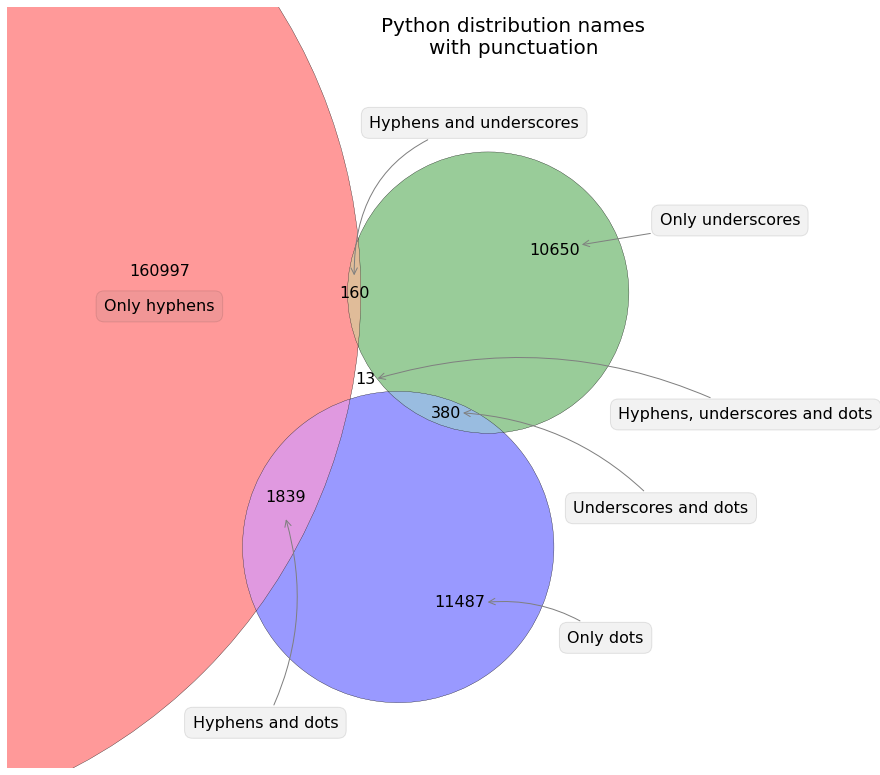

In [32]:
label_fontsize = 16
title_fontsize = 20
fig, axes = plt.subplots(figsize=(14, 14))

subsets = set(names_with_hyphens), set(names_with_underscores), set(names_with_dots)
set_labels = ('', '', '')
v = venn3(subsets=subsets, set_labels=set_labels, ax=axes)
c = venn3_circles(subsets=subsets, linewidth=0.3, ax=axes)
v.get_label_by_id('100').set_position(xy=(0.25, 0.04))

for text in v.subset_labels:
    text.set_fontsize(label_fontsize)

axes.annotate('Only hyphens', 
              xy=v.get_label_by_id('100').get_position() - np.array([0, 0.02]), xytext=(0, -20),
              ha='center', textcoords='offset points', fontsize=label_fontsize,
              bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1))
axes.annotate('Only underscores',
              xy=v.get_label_by_id('010').get_position() + np.array([0.025, 0.005]), xytext=(150, 20),
              ha='center', textcoords='offset points', fontsize=label_fontsize,
              bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0',color='gray')) 
axes.annotate('Hyphens and underscores',
              xy=v.get_label_by_id('110').get_position() + np.array([0, 0.015]), xytext=(120, 150),
              ha='center', textcoords='offset points', fontsize=label_fontsize,
              bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.4',color='gray'))
axes.annotate('Hyphens, underscores and dots',
              xy=v.get_label_by_id('111').get_position() + np.array([0.01, 0]), xytext=(370, -40),
              ha='center', textcoords='offset points', fontsize=label_fontsize,
              bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2',color='gray'))
axes.annotate('Underscores and dots',
              xy=v.get_label_by_id('011').get_position() + np.array([0.015, 0]), xytext=(200, -100),
              ha='center', textcoords='offset points', fontsize=label_fontsize,
              bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2',color='gray'))
axes.annotate('Hyphens and dots',
              xy=v.get_label_by_id('101').get_position() - np.array([0, 0.02]), xytext=(-20, -210),
              ha='center', textcoords='offset points', fontsize=label_fontsize,
              bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2',color='gray'))
axes.annotate('Only dots',
              xy=v.get_label_by_id('001').get_position() + np.array([0.025, 0]), xytext=(120, -40),
              ha='center', textcoords='offset points', fontsize=label_fontsize,
              bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2',color='gray'))
axes.set_title('Python distribution names\nwith punctuation', loc='center', x=0.7, y=0.93, fontsize=title_fontsize)
axes.set_xlim(xmin=0.1)
axes.set_ylim(ymin=-0.45, ymax=0.3)

diagram_file_path = IMAGE_DATA_PATH / 'names_with_punctuation.png' 
plt.savefig(diagram_file_path, bbox_inches='tight')
plt.show()